In [1]:
import numpy as np
from PIL import Image
from tqdm import tqdm
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def extend(input_image, radius, boundary='zero'):
    if input_image.ndim == 2:
        extended_image = np.zeros((input_image.shape[0]+2*radius, input_image.shape[1]+2*radius),
                                  dtype=input_image.dtype)
    else:
        extended_image = np.zeros((input_image.shape[0]+2*radius, input_image.shape[1]+2*radius, input_image.shape[2]),
                                 dtype=input_image.dtype)
    extended_image[radius:-radius,radius:-radius] = input_image
    
    if boundary == 'periodic':
        extended_image[:radius,:radius] = input_image[-radius:,-radius:]
        extended_image[-radius:,-radius:] = input_image[:radius,:radius]
        extended_image[:radius,-radius:] = input_image[-radius:,:radius]
        extended_image[-radius:,:radius] = input_image[:radius,-radius:]

        extended_image[:radius,radius:-radius] = input_image[-radius:,:]
        extended_image[-radius:,radius:-radius] = input_image[:radius,:]
        extended_image[radius:-radius, :radius] = input_image[:,-radius:]
        extended_image[radius:-radius, -radius:] = input_image[:,:radius]
    elif boundary == 'mirror':
        extended_image[:radius,:radius] = np.flipud(np.fliplr(input_image[:radius,:radius]))
        extended_image[-radius:,-radius:] = np.flipud(np.fliplr(input_image[-radius:,-radius:]))
        extended_image[:radius,-radius:] = np.flipud(np.fliplr(input_image[:radius,-radius:]))
        extended_image[-radius:,:radius] = np.flipud(np.fliplr(input_image[-radius:,:radius]))

        extended_image[:radius,radius:-radius] = np.flipud(input_image[:radius,:])
        extended_image[-radius:,radius:-radius] = np.flipud(input_image[-radius:,:])
        extended_image[radius:-radius, :radius] = np.fliplr(input_image[:,:radius])
        extended_image[radius:-radius, -radius:] = np.fliplr(input_image[:,-radius:])
    
    return extended_image

# Train CNN

In [199]:
crops = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif'))
band_01 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_12.tif'))

In [200]:
band_01 = equalize_hist(band_01)
band_02 = equalize_hist(band_02)
band_03 = equalize_hist(band_03)
band_04 = equalize_hist(band_04)
band_05 = equalize_hist(band_05)
band_06 = equalize_hist(band_06)
band_07 = equalize_hist(band_07)
band_08 = equalize_hist(band_08)
band_8A = equalize_hist(band_8A)
band_09 = equalize_hist(band_09)
band_10 = equalize_hist(band_10)
band_11 = equalize_hist(band_11)
band_12 = equalize_hist(band_12)

In [201]:
crops = crops[1000:,:-1000]

band_01 = band_01[1000:,:-1000]
band_02 = band_02[1000:,:-1000]
band_03 = band_03[1000:,:-1000]
band_04 = band_04[1000:,:-1000]
band_05 = band_05[1000:,:-1000]
band_06 = band_06[1000:,:-1000]
band_07 = band_07[1000:,:-1000]
band_08 = band_08[1000:,:-1000]
band_8A = band_8A[1000:,:-1000]
band_09 = band_09[1000:,:-1000]
band_10 = band_10[1000:,:-1000]
band_11 = band_11[1000:,:-1000]
band_12 = band_12[1000:,:-1000]

ndvi = (band_08 - band_04) / (band_08 + band_04)
lswi = (band_08 - band_11) / (band_08 + band_11)

We extend images because some of the classified pixels can be close to the boarders.

In [202]:
crops = extend(crops, 100)
band_01 = extend(band_01, 100, boundary='mirror')
band_02 = extend(band_02, 100, boundary='mirror')
band_03 = extend(band_03, 100, boundary='mirror')
band_04 = extend(band_04, 100, boundary='mirror')
band_05 = extend(band_05, 100, boundary='mirror')
band_06 = extend(band_06, 100, boundary='mirror')
band_07 = extend(band_07, 100, boundary='mirror')
band_08 = extend(band_08, 100, boundary='mirror')
band_8A = extend(band_8A, 100, boundary='mirror')
band_09 = extend(band_09, 100, boundary='mirror')
band_10 = extend(band_10, 100, boundary='mirror')
band_11 = extend(band_11, 100, boundary='mirror')
band_12 = extend(band_12, 100, boundary='mirror')
ndvi = extend(ndvi, 100, boundary='mirror')
lswi = extend(lswi, 100, boundary='mirror')
evi = extend(evi, 100, boundary='mirror')

In [203]:
corn = np.where(crops==1)
wheat = np.where(crops==23)
soybeans = np.where(crops==5)
drybeans = np.where(crops==42)
sugarbeets = np.where(crops==41)

In [204]:
print(corn[0].shape)
print(wheat[0].shape)
print(soybeans[0].shape)
print(drybeans[0].shape)
print(sugarbeets[0].shape)

(873894,)
(1109176,)
(1503186,)
(284400,)
(470115,)


In [205]:
sample_size = 1000
r = np.random.choice(range(len(corn[0])), size=sample_size, replace=False)
corn = (corn[0][r], corn[1][r])
r = np.random.choice(range(len(wheat[0])), size=sample_size, replace=False)
wheat = (wheat[0][r], wheat[1][r])
r = np.random.choice(range(len(soybeans[0])), size=sample_size, replace=False)
soybeans = (soybeans[0][r], soybeans[1][r])
r = np.random.choice(range(len(drybeans[0])), size=sample_size, replace=False)
drybeans = (drybeans[0][r], drybeans[1][r])
r = np.random.choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

Crop patches.

In [206]:
s = 22 # neighborhood radius of the classified pixel

images_corn = [np.dstack([
                band_01[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_02[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_03[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_04[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_05[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_06[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_07[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_08[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_8A[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_09[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_10[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_11[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_12[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                ndvi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                lswi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((corn[0], corn[1]))]

images_wheat = [np.dstack([
    band_01[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_02[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_03[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_04[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_05[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_06[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_07[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_08[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_8A[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_09[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_10[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_11[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_12[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                ndvi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                lswi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((wheat[0], wheat[1]))]

images_soybeans = [np.dstack([
    band_01[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_02[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_03[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_04[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_05[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_06[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_07[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_08[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_8A[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_09[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_10[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_11[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_12[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                ndvi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                lswi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((soybeans[0], soybeans[1]))]

images_drybeans = [np.dstack([
    band_01[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_02[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_03[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_04[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_05[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_06[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_07[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_08[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_8A[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_09[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_10[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_11[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_12[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                ndvi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                lswi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((drybeans[0], drybeans[1]))]

images_sugarbeets = [np.dstack([
    band_01[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_02[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_03[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_04[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_05[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_06[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_07[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_08[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_8A[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_09[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_10[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_11[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                band_12[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                ndvi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1],
                lswi[pixel[0]-s:pixel[0]+s+1, pixel[1]-s:pixel[1]+s+1]]) for pixel in np.column_stack((sugarbeets[0], sugarbeets[1]))]

In [207]:
X = np.vstack((images_corn, images_wheat, images_soybeans, images_drybeans, images_sugarbeets))
y = np.hstack(([0]*len(images_corn), [1]*len(images_wheat), [2]*len(images_soybeans), [3]*len(images_drybeans), [4]*len(images_sugarbeets)))

Example of the croped patch.

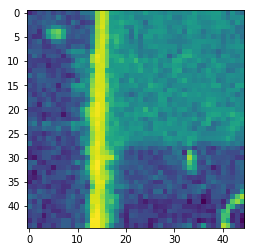

In [208]:
i = 98
plt.imshow(X[0][...,1])
plt.show()

In [119]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [209]:
#Building the model
gmodel = Sequential()
#Conv Layer 1
gmodel.add(Conv2D(50, kernel_size=(2,2), activation='relu', input_shape=(45,45,15)))
gmodel.add(MaxPooling2D(pool_size=(8,8), strides=(2,2)))
gmodel.add(Dropout(0.5))

#Conv Layer 2
gmodel.add(Conv2D(50, kernel_size=(2,2), activation='relu'))
gmodel.add(MaxPooling2D(pool_size=(8,8), strides=(2,2)))
gmodel.add(Dropout(0.5))

#Flatten the data for upcoming dense layers
gmodel.add(Flatten())

#Dense Layers
gmodel.add(Dense(1000))
gmodel.add(Activation('relu'))
gmodel.add(Dropout(0.5))

#Sigmoid Layer
gmodel.add(Dense(5))
gmodel.add(Activation('softmax'))

mypotim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
gmodel.compile(loss='sparse_categorical_crossentropy', optimizer=mypotim, metrics=['sparse_categorical_accuracy'])
gmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 44, 44, 50)        3050      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 50)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 19, 19, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 50)        10050     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 50)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)              0         
__________

In [121]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, test_size=0.25)

In [211]:
es = EarlyStopping('loss', patience=10, mode="min")
msave = ModelCheckpoint('.model_weights.hdf5', monitor='loss', save_best_only=True)
callbacks = [es, msave]

In [216]:
history = gmodel.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,
                     validation_data=(X_valid, y_valid), callbacks=callbacks)

Train on 3750 samples, validate on 1250 samples
Epoch 1/100
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.9024
Epoch 2/100
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.4857 - val_sparse_categorical_accuracy: 0.8896
Epoch 3/100
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.5454 - val_sparse_categorical_accuracy: 0.8768
Epoch 4/100
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1342 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.5696 - val_sparse_categorical_accuracy: 0.8672
Epoch 5/100
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1213 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8808
Epoch 6/100
3750/3750 [=========

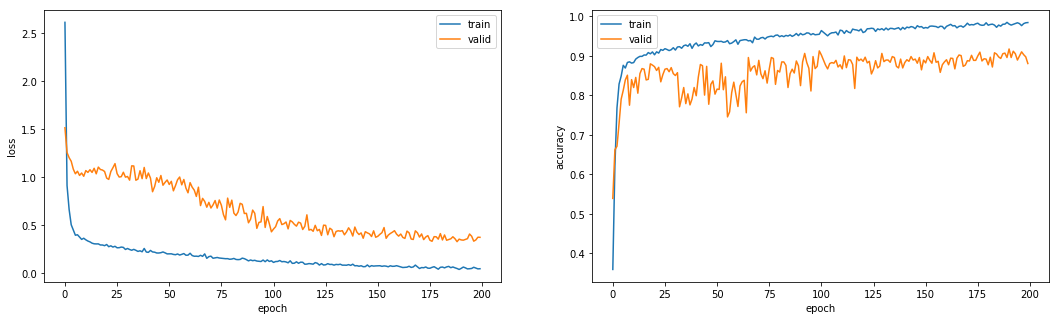

In [219]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(np.concatenate([history_1.history['loss'], history_2.history['loss']]), label='train')
plt.plot(np.concatenate([history_1.history['val_loss'], history_2.history['val_loss']]), label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(np.concatenate([history_1.history['sparse_categorical_accuracy'], history_2.history['sparse_categorical_accuracy']]),
         label='train')
plt.plot(np.concatenate([history_1.history['val_sparse_categorical_accuracy'], history_2.history['val_sparse_categorical_accuracy']]),
         label='valid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [215]:
history_1 = history

In [218]:
history_2 = history

# Make predictions

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [154]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [220]:
crops = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif'))
band_01 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_12.tif'))

In [221]:
band_01 = equalize_hist(band_01)
band_02 = equalize_hist(band_02)
band_03 = equalize_hist(band_03)
band_04 = equalize_hist(band_04)
band_05 = equalize_hist(band_05)
band_06 = equalize_hist(band_06)
band_07 = equalize_hist(band_07)
band_08 = equalize_hist(band_08)
band_8A = equalize_hist(band_8A)
band_09 = equalize_hist(band_09)
band_10 = equalize_hist(band_10)
band_11 = equalize_hist(band_11)
band_12 = equalize_hist(band_12)

In [222]:
test_area = np.zeros_like(crops[:1000,-1000:])
test_area[np.where(crops[:1000,-1000:]==1)] = 1
test_area[np.where(crops[:1000,-1000:]==23)] = 2
test_area[np.where(crops[:1000,-1000:]==5)] = 3
test_area[np.where(crops[:1000,-1000:]==42)] = 4
test_area[np.where(crops[:1000,-1000:]==41)] = 5

band_01 = band_01[:1000,-1000:]
band_02 = band_02[:1000,-1000:]
band_03 = band_03[:1000,-1000:]
band_04 = band_04[:1000,-1000:]
band_05 = band_05[:1000,-1000:]
band_06 = band_06[:1000,-1000:]
band_07 = band_07[:1000,-1000:]
band_08 = band_08[:1000,-1000:]
band_8A = band_8A[:1000,-1000:]
band_09 = band_09[:1000,-1000:]
band_10 = band_10[:1000,-1000:]
band_11 = band_11[:1000,-1000:]
band_12 = band_12[:1000,-1000:]

ndvi = (band_08 - band_04) / (band_08 + band_04)
lswi = (band_08 - band_11) / (band_08 + band_11)

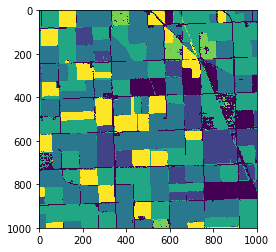

In [223]:
plt.imshow(test_area)

In [224]:
test_area.shape

(1000, 1000)

In [225]:
band_01 = extend(band_01, 100, boundary='mirror')
band_02 = extend(band_02, 100, boundary='mirror')
band_03 = extend(band_03, 100, boundary='mirror')
band_04 = extend(band_04, 100, boundary='mirror')
band_05 = extend(band_05, 100, boundary='mirror')
band_06 = extend(band_06, 100, boundary='mirror')
band_07 = extend(band_07, 100, boundary='mirror')
band_08 = extend(band_08, 100, boundary='mirror')
band_8A = extend(band_8A, 100, boundary='mirror')
band_09 = extend(band_09, 100, boundary='mirror')
band_10 = extend(band_10, 100, boundary='mirror')
band_11 = extend(band_11, 100, boundary='mirror')
band_12 = extend(band_12, 100, boundary='mirror')
ndvi = extend(ndvi, 100, boundary='mirror')
lswi = extend(lswi, 100, boundary='mirror')

In [226]:
s = 22

In [227]:
preds = []
for i in tqdm(range(100,1100)):# test_area.shape[0]-100)):
    X_test = np.array([np.dstack([band_01[i-s:i+s+1,j-s:j+s+1], 
                               band_02[i-s:i+s+1,j-s:j+s+1], band_03[i-s:i+s+1,j-s:j+s+1],
                               band_04[i-s:i+s+1,j-s:j+s+1], band_05[i-s:i+s+1,j-s:j+s+1], band_06[i-s:i+s+1,j-s:j+s+1],
                               band_07[i-s:i+s+1,j-s:j+s+1], band_08[i-s:i+s+1,j-s:j+s+1], band_8A[i-s:i+s+1,j-s:j+s+1],
                               band_09[i-s:i+s+1,j-s:j+s+1], band_10[i-s:i+s+1,j-s:j+s+1], band_11[i-s:i+s+1,j-s:j+s+1],
                               band_12[i-s:i+s+1,j-s:j+s+1],
                                  ndvi[i-s:i+s+1,j-s:j+s+1], lswi[i-s:i+s+1,j-s:j+s+1]]) for j in range(100,1100)])
    preds.append(gmodel.predict_classes(X_test))

100%|██████████| 1000/1000 [27:34<00:00,  1.65s/it]


In [228]:
preds = np.array(preds) + 1

In [229]:
preds.shape

(1000, 1000)

In [230]:
test_area.shape

(1000, 1000)

In [231]:
preds[np.where(test_area==0)] = 0

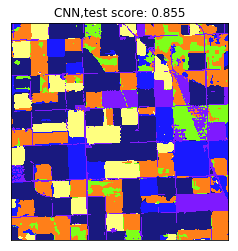

In [241]:
cmap = {0:[0.5,0.1,1.0,1],1:[0.1,0.1,1.0,1],2:[0.1,0.1,0.5,1],3:[1.0,0.5,0.1,1],4:[0.5,1.0,0.1,1],5:[1.0,1.0,0.5,1]}
labels = {0:'other',1:'corn',2:'wheat',3:'soybeans',4:'drybeans',5:'sugarbeets'}
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in preds]) 
plt.imshow(arrayShow)
plt.title("CNN,test score: "+str(round(accuracy_score(test_area[np.where(test_area!=0)], preds[np.where(test_area!=0)]),3)))
plt.show()

In [233]:
cm = confusion_matrix(test_area[np.where(test_area!=0)], preds[np.where(test_area!=0)])

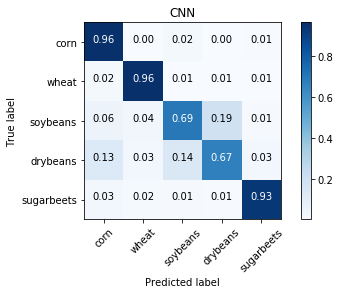

In [234]:
plot_confusion_matrix(cm, normalize=True, classes=['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'], title='CNN')

In [235]:
accuracy_score(test_area[np.where(test_area!=0)], preds[np.where(test_area!=0)])

0.8554943718298204

In [236]:
from keras.utils import plot_model

In [237]:
plot_model(gmodel, to_file='model.png', show_layer_names=False, show_shapes=True, rankdir='LR')